The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



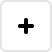
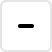
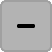
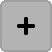
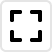
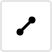
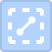
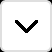
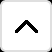
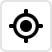

In [1]:
import pandas as pd
from lets_plot.geo_data import *
from lets_plot import *
LetsPlot.setup_html()

In [2]:
data = {
    'x': [
        0
    ],
    'name': [
        "The Lorem ipsum text"
    ],
    'type': [
        "Text"
    ],
    'description': [
        "A placeholder text commonly used to demonstrate the visual form of a document or a typeface without relying on meaningful content."
    ],
    'text': [
        "Lorem ipsum dolor sit amet, consectetur adipiscing elit. In ligula lacus, lobortis et metus in, consequat vulputate arcu. Morbi dui nibh, accumsan sit amet sagittis sed, aliquet nec ligula. Donec at metus sit amet tellus bibendum interdum quis ut lorem. Sed eget lectus et lectus porttitor laoreet eget et nunc. Nulla facilisi. Sed vehicula rhoncus velit quis tincidunt. Mauris varius efficitur quam, a dapibus quam maximus at. Nullam quis ullamcorper sem. Sed suscipit metus quis tempus bibendum. In nec sagittis mauris. Sed finibus tortor dignissim, hendrerit elit eget, mattis leo. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; Nunc eget pretium orci, eget pulvinar velit. Vestibulum quam risus, gravida ut vestibulum non, semper sed est."
    ]
}


(ggplot(data, aes('x')) 
 + geom_point(tooltips = layer_tooltips()
                            .line('@|@type')
                            .line('@|@description')
                            .line('@|@text'))
 + ylim(0,1)
 + ggsize(600, 800)
)

In [3]:
cities = pd.read_csv ("../data/cities.csv")
cities.head()

,Unnamed: 0,name,link,coutry_id,latitude,longitude,text
0,0,Algiers,/wiki/Algiers,1,36.776389,3.058611,"— with nearly 3 million inhabitants, Algiers ..."
1,1,Annaba,/wiki/Annaba,1,36.900000,7.766667,"— a town with 200,000 inhabitants in the east..."
2,2,Batna,/wiki/Batna,1,35.550000,6.166667,NaN
3,3,Bechar,/wiki/Bechar,1,31.633333,-2.200000,"— small city in the Sahara, not far from the ..."
4,4,Constantine,/wiki/Constantine,1,36.365000,6.614722,- Algeria's 3rd largest city with a canyon go...


In [4]:
czech_cities = cities.loc[cities['coutry_id'] == 144]
czech_cities

,Unnamed: 0,name,link,coutry_id,latitude,longitude,text
1044,0,Prague,/wiki/Prague,144,50.083333,14.416667,() — the capital and largest city of the Czec...
1045,1,Brno,/wiki/Brno,144,49.200000,16.616667,— the largest city in Moravia and its former ...
1046,2,České Budějovice,/wiki/%C4%8Cesk%C3%A9_Bud%C4%9Bjovice,144,48.974722,14.474722,– attractive large city in South Bohemia
1047,3,Český Krumlov,/wiki/%C4%8Cesk%C3%BD_Krumlov,144,48.816667,14.316667,— beautiful old town in South Bohemia with th...
1048,4,Karlovy Vary,/wiki/Karlovy_Vary,144,50.233333,12.866667,"() — historic (and biggest Czech) spa resort,..."
1049,5,Kutná Hora,/wiki/Kutn%C3%A1_Hora,144,49.950000,15.266667,— historical town with famous Saint Barbara c...
1050,6,Olomouc,/wiki/Olomouc,144,49.600000,17.250000,( or ) — riverside university town with a tho...
1051,7,Ostrava,/wiki/Ostrava,144,49.835556,18.292500,— a vibrant local subculture and long history...
1052,8,Pilsen,/wiki/Pilsen,144,49.747500,13.377500,() — home of the original Pilsner Urquell bee...


In [5]:
country_gcoder = geocode_countries(['Czech'])
country_gcoder.get_geocodes()

,id,country,found name,centroid,position,limit
0,51684,Czech,Česko,"[15.5282667270321, 49.8037022352219]","[12.0905895531178, 48.5518079996109, 18.859253...","[12.0905895531178, 48.5518079996109, 18.859253..."


In [6]:
(ggplot()
 + geom_livemap(location=[15.78,49.35], zoom=6)
 + geom_polygon(aes(fill='country'), 
                data=country_gcoder.get_boundaries(), 
                alpha=.2)
 + geom_point(aes('longitude', 'latitude', color='name'),
                data=czech_cities,
                size=4, 
                tooltips=layer_tooltips()
                    .line('City|@name')
                    .line('Longitude|@longitude')
                    .line('Latitude|@latitude')
                    .line('Description|@text'))
 + theme(legend_position='none')
)